In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

Load Dataset

In [3]:
data = pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.shape

(9994, 13)

In [8]:
data.duplicated().sum()

17

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(9977, 13)

In [11]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
data['Ship Mode'].value_counts().to_frame()

,Ship Mode
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


In [13]:
data['Segment'].value_counts().to_frame()

,Segment
Consumer,5183
Corporate,3015
Home Office,1779


In [14]:
data['Country'].value_counts().to_frame()

,Country
United States,9977


In [15]:
data['State'].value_counts().to_frame()

,State
California,1996
New York,1127
Texas,983
Pennsylvania,586
Washington,502
Illinois,491
Ohio,468
Florida,383
Michigan,254
North Carolina,249


In [16]:
data['City'].value_counts().to_frame()

,City
New York City,914
Los Angeles,746
Philadelphia,536
San Francisco,506
Seattle,424
...,...
Glenview,1
Missouri City,1
Rochester Hills,1
Palatine,1


In [17]:
data['Region'].value_counts().to_frame()

,Region
West,3193
East,2845
Central,2319
South,1620


In [18]:
data['Category'].value_counts().to_frame()

,Category
Office Supplies,6012
Furniture,2118
Technology,1847


In [19]:
data['Sub-Category'].value_counts().to_frame()

,Sub-Category
Binders,1522
Paper,1359
Furnishings,956
Phones,889
Storage,846
Art,795
Accessories,775
Chairs,615
Appliances,466
Labels,363


In [20]:
data.drop(columns=['Country', 'Postal Code'], inplace=True)

In [21]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20884\460133985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

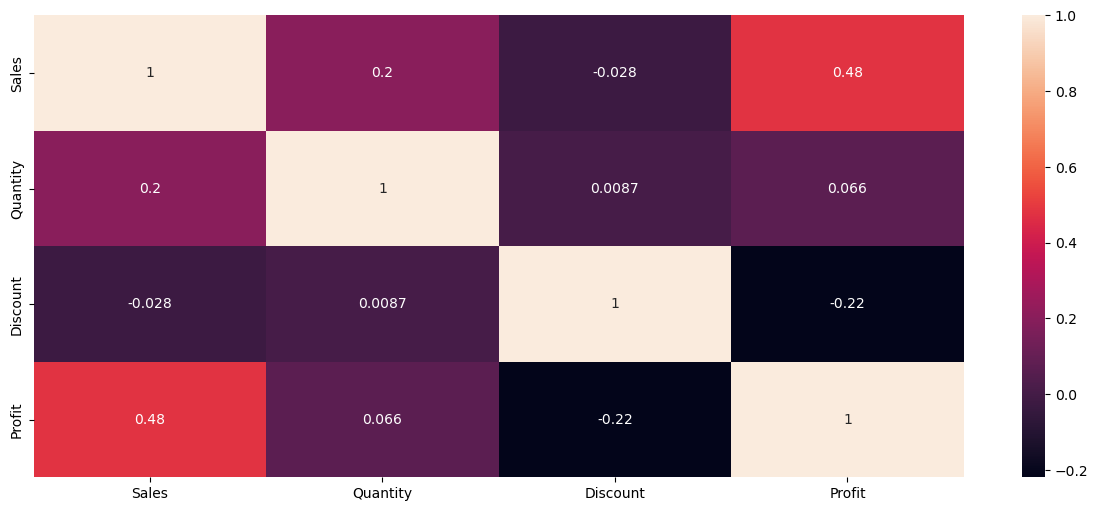

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

#**Region Analysis**

In [23]:
data['Sales'].sum()

2296195.5903

In [24]:
data['Profit'].sum()

286241.4226

In [25]:
sales = data.groupby(["Region"])["Sales"].sum()
sales = pd.DataFrame(sales).reset_index()
sales

,Region,Sales
0,Central,500782.8528
1,East,678435.1960
2,South,391721.9050
3,West,725255.6365


## Sales Per Region

In [26]:
fig = px.bar(data.groupby("Region")["Sales"].sum(),title="Sales By Region",width=500, height=400)
fig.show()

In [27]:
fig = px.pie(data.groupby("Region")["Profit"].sum(), values="Profit", names=data.groupby("Region").groups.keys(),title="Sales By Region",width=500, height=500)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',paper_bgcolor='lightgray')
fig.show()

## Profit Per Region

In [28]:
sales = data.groupby(["Region"])["Profit"].sum()
sales = pd.DataFrame(sales).reset_index()
sales

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


In [29]:
fig = px.bar(data.groupby("Region")["Profit"].sum(),title="Profit By Region",color_discrete_sequence=["green"],width=500, height=400)
fig.show()

In [30]:
fig = px.pie(data.groupby("Region")["Profit"].sum(), values="Profit", names=data.groupby("Region").groups.keys(),title="Profit By Region",width=500, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True,legend_title='Region')
fig.show()

# Category Analysis

In [31]:
Category = data.groupby(["Category"])["Profit"].sum()
Category = pd.DataFrame(Category).reset_index()
Category

,Category,Profit
0,Furniture,18421.8137
1,Office Supplies,122364.6608
2,Technology,145454.9481


## Sales Per Category

In [32]:
fig = px.bar(data.groupby("Category")["Sales"].sum(),title="Sales By Category",width=500, height=400)
fig.show()

In [33]:
fig = px.pie(data.groupby("Category")["Sales"].sum(), values="Sales", names=data.groupby("Category").groups.keys(),title="Sales By Category",width=500, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',paper_bgcolor='lightgray',showlegend=True,legend_title='Category')
fig.show()

## Profit Per Category

In [34]:
fig = px.bar(data.groupby("Category")["Profit"].sum(),title="Profit By Category",color_discrete_sequence=["green"],width=500, height=400)
fig.show()

In [35]:
fig = px.pie(data.groupby("Category")["Profit"].sum(), values="Profit", names=data.groupby("Category").groups.keys(),title="Profit By Category",width=500, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True,legend_title='Category')
fig.show()

# Sub-Category Analysis

In [36]:
Sub_Category = data.groupby(["Sub-Category"])["Profit"].sum()
Sub_Category = pd.DataFrame(Sub_Category).reset_index()
Sub_Category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6524.6118
3,Binders,30228.0003
4,Bookcases,-3472.5560
5,Chairs,26567.1278
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13052.7230


## Sales Per Sub-Category

In [37]:
fig = px.bar(data.groupby("Sub-Category")["Sales"].sum(),title="Sales By Sub-Category",width=600, height=400)
fig.update_layout(xaxis_tickangle=60)
fig.show()

In [38]:
fig = px.pie(data.groupby("Sub-Category")["Profit"].sum(), values="Profit", names=data.groupby("Sub-Category").groups.keys(),title="Sales By Sub-Category",width=600, height=500)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',paper_bgcolor='lightgray')
fig.show()

## Profit Per Sub-Category

In [39]:
sub_category = data.groupby(["Sub-Category"])["Profit"].sum()
sub_category = pd.DataFrame(sub_category).reset_index()
sub_category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6524.6118
3,Binders,30228.0003
4,Bookcases,-3472.5560
5,Chairs,26567.1278
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13052.7230


In [40]:
fig = px.bar(data.groupby("Sub-Category")["Profit"].sum(),title="Profit By Sub-Category",color_discrete_sequence=["green"],width=600, height=400)
fig.update_layout(xaxis_tickangle=60)
fig.show()

In [41]:
fig = px.pie(data.groupby("Sub-Category")["Profit"].sum(), values="Profit", names=data.groupby("Sub-Category").groups.keys(),title="Profit By Sub-Category",width=600, height=500)
fig.update_layout(showlegend=True,legend_title='Ship Mode')
fig.show()

In [42]:
fig = px.bar(data, x="Quantity", y="Sub-Category", color="Quantity", template="plotly_white", width=800, height=400)
fig.update_layout(title="Quantity from each Sub-Category",xaxis=dict(title="Quantity"),yaxis=dict(title="Sub-Category"))
fig.show()

# City Analysis

In [43]:
fig = px.bar(data.groupby("City")["Sales"].sum(),title="Sales By City",color_discrete_sequence=["orange"])
fig.show()

In [44]:
groupdata = data.groupby("City")["Sales"].sum()
filterdata = groupdata[groupdata>50000]
fig = px.bar(filterdata, x=filterdata.index, y=filterdata.values,title="Sales By City Above 50000",color_discrete_sequence=["orange"],width=500, height=400)
fig.update_layout(xaxis_tickangle=50)
fig.show()

In [45]:
fig = px.bar(data.groupby("City")["Profit"].sum(),title="Profit By City",color_discrete_sequence=["orange"])
fig.show()

In [46]:
city_sales = data.groupby("City")["Profit"].sum().reset_index()
city_sales_sorted = city_sales.sort_values("Profit", ascending=False)
top_profitable_cities = city_sales_sorted.head(5)
top_loss_cities = city_sales_sorted.tail(5)
top_cities = pd.concat([top_profitable_cities, top_loss_cities])
fig = px.bar(top_cities, x="City", y="Profit",color_discrete_sequence=["orange"],title="Profit & Loss Of Top 5 City",width=700, height=400)
fig.show()

# State Analysis

In [47]:
sales_profit = data.groupby(["State"])[["Sales", "Profit"]].mean()
sales_profit

,Sales,Profit
State,,
Alabama,319.846557,94.865989
Arizona,157.508933,-15.303235
Arkansas,194.635500,66.811452
California,229.246629,38.241878
Colorado,176.418231,-35.867351
Connecticut,163.223866,42.823071
Delaware,285.948635,103.930988
District of Columbia,286.502000,105.958930
Florida,233.612815,-8.875461


In [48]:
fig = px.bar(sales_profit, x=sales_profit.index, y="Sales", color="Sales",template="plotly_white", width=800, height=400,)
fig.update_layout(xaxis=dict(title="State", tickangle=70),yaxis=dict(title="Sales"),title="AVERAGE SALES IN ALL STATES")
fig.show()

In [49]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
              'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
              'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
              'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
              'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
              'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
              'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA',
              'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
              'Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV',
              'Wisconsin': 'WI','Wyoming': 'WY'}
data['state_code'] = data.State.apply(lambda x: state_code[x])

In [50]:
state_data = data[['Profit', 'state_code']].groupby(['state_code']).sum()
fig = go.Figure(data=go.Choropleth(locations=state_data.index,z = state_data.Profit,locationmode = 'USA-states',colorscale = 'Viridis',colorbar_title = 'Profit in USA'))
fig.update_layout(title_text = 'Total State-Wise Profit',geo_scope='usa',)
fig.show();

In [51]:
fig = px.scatter(data, x='State', y='Profit', width=900, height=400)
fig.update_layout(title="State vs Profit",xaxis=dict(title="State", tickangle=75),yaxis=dict(title="Profit"))
fig.show()

## State Analysis By Segment

In [52]:
Furniture = data.set_index(['Category']).loc['Furniture']
Office = data.set_index(['Category']).loc['Office Supplies']
Technology = data.set_index(['Category']).loc['Technology']

In [53]:
fig = px.bar(Furniture.groupby('State').sum().sort_values('Profit'), y='Profit')
fig.update_layout(title='Furniture Profit from Each State',yaxis=dict(title='Profit'))
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20884\1015617701.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [54]:
fig = px.bar(Office.groupby('State').sum().sort_values('Profit'), y='Profit')
fig.update_layout(title='Office Profit from Each State',yaxis=dict(title='Profit'))
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20884\2352404463.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [55]:
fig = px.bar(Technology.groupby('State').sum().sort_values('Profit'), y='Profit')
fig.update_layout(title='Technology Profit from Each State',yaxis=dict(title='Profit'))
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20884\4242385874.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# **Segment Analysis**

In [58]:
categ = data.groupby(['Segment']).sum()[['Profit','Sales']]
fig = px.pie(categ, values='Sales', names=categ.index,template='plotly_white',title='Sales Distribution by Segment')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True,legend_title='Segment',width=500,height=400)
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20884\1207009799.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# **Ship Mode Analysis**

In [61]:
categ = data.groupby(['Ship Mode']).sum()[['Profit','Sales']]
fig = px.pie(categ, values='Sales', names=categ.index,template='plotly_white',title='Sales Distribution by Ship Mode')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True,legend_title='Ship Mode',width=500,height=500)
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20884\1321682748.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

